# 労働移動

### Hardware

In [1]:
%%bash
system_profiler SPHardwareDataType | \
grep -E "Model Identifier"\|"Processor Name"\|"Processor Speed"\|"Number of Processors"\|"Memory:"

      Model Identifier: MacBookPro13,1
      Processor Name: Dual-Core Intel Core i5
      Processor Speed: 2 GHz
      Number of Processors: 1
      Memory: 16 GB


In [2]:
!python -V

Python 3.7.4


In [3]:
#!pip install --upgrade <module name>

### Import

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [5]:
print('numpy', np.__version__)
print('pandas', pd.__version__)

numpy 1.18.2
pandas 1.0.3


## 1. サーチモデル
### Keyword

- McCall model


### サーチモデルの特徴

競争近郊モデルでも補償賃金格差モデルでも、同一の仕事に対して支払われる賃金は、市場均衡賃金であり、企業間で同一であると仮定している。しかし現実には、同質の仕事に対して支払われる賃金が異なることがある。これを「情報の不完全性」、つまり労働者がどの企業がどの賃金を提供しているという情報を知る程度には限界があるという観点から説明するモデルである。

### 単純なサーチモデル
#### 設定

- $w$ : wage
- $f(w)$: wage distribution
- 労働者は2期間生きる
- 労働者は各期の初めにjob searchを行う（就業状態に関係なく実施する）
- job searchにはコストは発生しない
- job searchの結果、期初に労働者は1つの賃金を提示され、その賃金分布は$f(w)$に従うとする
- 労働者は毎期、転職するかしないかの意思決定をする
- 無職のときに転職しない場合は、失業保険と余暇をエンジョイし、それの金銭的価値を$b$とする
- 労働者は2期間の所得の現在価値の和を最大化するように行動する
- $(1 + r)^{-1}$を割引現在価値とする

#### 解き方

第二期の意思決定は第一期に労働者が得ていた賃金水準に従うので、まず第二期の行動について考え、その次に第一期の行動について考える。

- 第二期の行動

$$
\begin{aligned}
E[I_2|\text{第1期に失業}] & = Pr(w > b)E[w|w>b] + (1 - Pr(w > b))b\\
& = Pr(w > b)(E[w|w>b] - b) + b
\end{aligned}
$$

$$
\begin{aligned}
E[I_2|\text{第1期に雇用}] & = Pr(w > w_1)E[w|w>w_1] + (1 - Pr(w > w_1))w_1\\
& = Pr(w > w_1)(E[w|w>w_1] - w_1) + w_1
\end{aligned}
$$

- 第一期の行動

以下の二つの所得現在価値（PV）を比較して意思決定するはず

$$
PV(\text{受諾}) = w_1 + \frac{Pr(w > w_1)(E[w|w>w_1] - w_1) + w_1}{1 + r}
$$

$$
PV(\text{失業) = w_1 + \frac{Pr(w > b)(E[w|w>b] - b) + b}{1 + r}
$$

つまり、$w > b$ならば労働者は第一期に就業することがわかる。

### The McCall model
#### 各期の意思決定内容

- 失業者は毎期$w_t$のjob offerをもらい、働くか働かないかの意思決定をする.

#### wage distribution

$$
w_t = w(s_t) \quad \text{where } \; s_t \in \mathbb{S}
$$

- $w_t$: wage at time t
- $\{s_t\}$: a random state which affect wage distribution
- $\{s_t\}$ is IID, with the pdf $q(s)$
- the agentは期初にstate, $s_t$, を観測する
- the set $\mathbb S$ is finite

#### Assumption 

At time $t$, our agent has two choices;

- Accept the offer and work permanently at constant wage $w_t$
- Reject the offer, receive unemployment compensation $c$, and reconsider next period.

#### Objective Function

$$
\mathbb{E} \sum_{t=0}^{\infty} \beta^t y_t
$$

- $\beta \in (0, 1)$


#### Trade-Off

The worker faces a trade-off:

- Waiting too long for a good offer is costly, since the future is discounted.
- Accepting too early is costly, since better offers might arrive in the future.

#### DPの解き方

Dynamic programming can be thought of as a two-step procedure that

1. first assigns values to “states” and
2. then deduces optimal actions given those values


#### The Value Function

Let $v^*(s)$ be the total lifetime value accruing to an unemployed worker who enters the current period unemployed when the state is $s \in \mathbb S$

$$
v^*(s)= \max \left\{
        \frac{w(s)}{1 - \beta}, \, c + \beta
        \sum_{s' \in \mathbb{S}} v^*(s') q (s')
    \right\} \tag{1}
$$

#### The Optimal Policy

- The optimal action is best thought of as a policy, which is, in general, a map from states to actions.
- $\sigma: \mathbb R \to \{0, 1\}$

$$
\sigma(s) := \mathbf{1}
    \left\{
        \frac{w(s)}{1 - \beta} \geq c + \beta \sum_{s' \in \mathbb S}
        v^*(s') q (s')
    \right\}
$$

このpolicy functionは次のように書き換えるこおができる

$$
\sigma(s) := \mathbf{1} \{ w(s) \geq \bar w \}
$$

where

$$
\bar w := (1 - \beta) \left\{ c + \beta \sum_{s'} v^*(s') q (s') \right\} \tag{2}
$$

- $\bar w$: the reservation wage
- The agent should accept if and only if the current wage offer exceeds the reservation wage.


### Computing the Optimal Policy

we need to compute the value function at each possible state $s \in \mathbb S$

- $\mathbb S = \{1, 2, 3, ..., n\}$
- The value function, $v^* = (v^*(i))_{i=1}^n$

$$
v^*(i)
= \max \left\{
        \frac{w(i)}{1 - \beta}, \, c + \beta \sum_{1 \leq j \leq n}
            v^*(j) q (j)
    \right\}
\quad
\text{for } i = 1, \ldots, n \tag{3}
$$

### Compuation Algorithm

- Step 1: pick an arbitrary initial guess, $v \in \mathbb R^n$
- Step 2: compute a new vector $v^' \in \mathbb R^n$

$$
v'(i)
= \max \left\{
        \frac{w(i)}{1 - \beta}, \, c + \beta \sum_{1 \leq j \leq n}
            v(j) q (j)
    \right\}
\quad
\text{for } i = 1, \ldots, n \tag{4}
$$

- Step 3: calculate a measure of the deviation between $v$ and $v'$, such as $\max_i |v(i)- v'(i)|$
- Step 4: if the deviation is larger than some fixed tolerance, set $v = v'$ and go to step 2, else continue.
- Step 5: return v

$\{v_k\}$ denote the sequence genererated by this algorithm.

### The Fixed Point Theory

- T: mapping $\mathbb R^n$ to itself

$$(Tv)(i)
= \max \left\{
        \frac{w(i)}{1 - \beta}, \, c + \beta \sum_{1 \leq j \leq n}
            v(j) q (j)
    \right\}
\quad
\text{for } i = 1, \ldots, n \tag{5}
$$

- see Banach Fixed point theorem
- One implication is that $T$ has a unique fixed point in $\mathbb R^n$


### Into Practice

```
[INPUT]
     q_defalut: default choice of q
     w_default: default choice of w
    
[OUTPUT]
    each stateごとのoptimal value

[CLASS DEPENDENCY]
    numpy
    scipy.stats.betabinom: q_defautの設定に使用（任意）

[ALGORITHM]
    set n; the number of state S
    set alpha, beta; initial value for BetaBinomial
    set q_default; BetaBinomial(n, alpha, beta) 
    set w_default; in accordance with q_default, whose length is n
    set c; compensation insurance
    set beta; discount value
    set tol; tolerance level
    set iter; the number of iteration
    
    v = w_defalut / (1 - beta)
    v_updated = random_value
    count = 0
    
    while abs(v - v_updated) > tol and count < iter:
        if count > 0:
            v = v_updated
        for (i == 0, i < n, i++):
            accept = w[i] / (1 - beta)
            reject = c + beta * sum(v * q)
            v_updated[i] == max(accept, reject)
        
        count += 1
     
     reservation_wage = (1 - beta) * (c + beta * sum(v * q))
    
     return v_updated, reservation_wage
```

In [6]:
from scipy.stats import betabinom

In [7]:
n, a, b = 50, 200, 100   # default parameters
q_default = []
for i in range(n+1):
    tmp = betabinom(n, a, b).pmf(i)
    q_default.append(tmp)

q_default = np.array(q_default)

In [8]:
w_min, w_max = 10, 60
w_default = np.linspace(w_min, w_max, n+1)

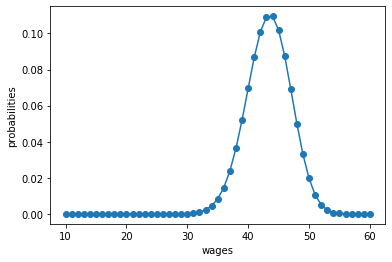

In [9]:
fig, ax = plt.subplots()
ax.plot(w_default, q_default, '-o', label='$q(w(i))$')
ax.set_xlabel('wages')
ax.set_ylabel('probabilities');

Classの定義

In [10]:
class McCallModel:

    def __init__(self, c=25, beta=0.99, w=w_default, q=q_default):

        self.c, self.beta = c, beta
        self.w, self.q = w_default, q_default

    def state_action_values(self, i, v):
        """
        The values of state-action pairs.
        """
        # Simplify names
        c, beta, w, q = self.c, self.beta, self.w, self.q
        # Evaluate value for each state-action pair
        # Consider action = accept or reject the current offer
        accept = w[i] / (1 - beta)
        reject = c + beta * np.sum(v * q)

        return np.array([accept, reject])

In [11]:
def compute_reservation_wage(mcm,
                             max_iter=500,
                             tol=1e-6):

    # Simplify names
    c, beta, w, q = mcm.c, mcm.beta, mcm.w, mcm.q

    # == First compute the value function == #

    n = len(w)
    v = w / (1 - beta)          # initial guess
    v_next = np.empty_like(v)
    i = 0
    error = tol + 1
    while i < max_iter and error > tol:

        for i in range(n):
            v_next[i] = np.max(mcm.state_action_values(i, v))

        error = np.max(np.abs(v_next - v))
        i += 1

        v[:] = v_next  # copy contents into v

    # == Now compute the reservation wage == #

    return v, (1 - beta) * (c + beta * np.sum(v * q))

In [12]:
mcm = McCallModel()
optimal_value, res = compute_reservation_wage(mcm)
res

47.3164997100239

### Comparative Statics

 let’s look at what happens when we change $\beta$ and $c$

In [13]:
grid_size = 25
R = np.empty((grid_size, grid_size))

c_vals = np.linspace(10.0, 30.0, grid_size)
β_vals = np.linspace(0.9, 0.99, grid_size)

for i, c in enumerate(c_vals):
    for j, β in enumerate(β_vals):
        mcm = McCallModel(c=c, beta=β)
        R[i, j] = compute_reservation_wage(mcm)[1]

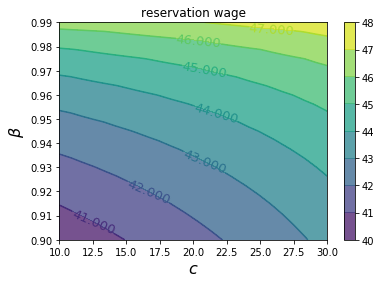

In [14]:
fig, ax = plt.subplots()

cs1 = ax.contourf(c_vals, β_vals, R.T, alpha=0.75)
ctr1 = ax.contour(c_vals, β_vals, R.T)

plt.clabel(ctr1, inline=1, fontsize=13)
plt.colorbar(cs1, ax=ax)


ax.set_title("reservation wage")
ax.set_xlabel("$c$", fontsize=16)
ax.set_ylabel("$β$", fontsize=16)

ax.ticklabel_format(useOffset=False)

plt.show()